Execution time: 1.6606333255767822 seconds


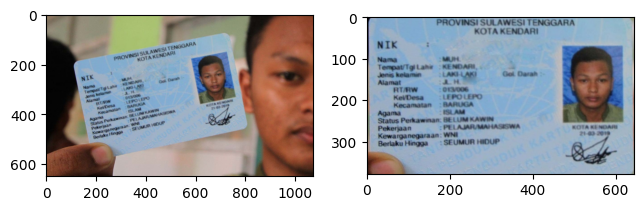

In [12]:
import base64
import cv2
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

input_image_name = 'images_test/sample-1.jpg'
api_host = 'http://10.81.84.211:8004/api/v1/'
endpoint = 'detection'

files = {'file': open(input_image_name, 'rb')}

response = requests.post(api_host+endpoint, files=files)

if response.status_code == 200:
    response_json = response.json()
    execution_time = response_json['execution_time']
    warped_image_base64 = response_json['warped_image']
    
    # Decode the base64 image
    warped_image_bytes = base64.b64decode(warped_image_base64)
    warped_image = Image.open(BytesIO(warped_image_bytes))
    
    # display the image
    raw = cv2.imread(input_image_name)
    raw = cv2.cvtColor(raw, cv2.COLOR_BGR2RGB)
    fig = plt.figure(figsize=(20, 10))
    ax1 = fig.add_subplot(1,5,1)
    ax1.imshow(raw)
    ax2 = fig.add_subplot(1,5,2)
    ax2.imshow(warped_image)

    print(f"Execution time: {execution_time} seconds")
else:
    print("Failed to process image:", response.text)